<h1>Initial Notes</h1>

All EDA will be done on Karim's pre processed data. Some EDA steps will be repeated from Steven's notebook, but done on the preprocessed data.

<h1>Imports</h1>

In [38]:
# Import libraries
import os
import time
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import r2_score, confusion_matrix, classification_report, roc_curve
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score
from pprint import pprint
warnings.filterwarnings("ignore")

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

In [2]:
# Import data
df_patients = pd.read_csv('../data/diabetic_data_processed.csv', 
                            na_values='?',
                            low_memory=False #silence the mixed dtypes warning
                           )

In [3]:
df_patients.head()

patient_nbr             race  gender       age admission_type_id  \
0          135        Caucasian  Female   [50-60)         Emergency   
1          378        Caucasian  Female   [50-60)          Elective   
2          729        Caucasian  Female  [80-100)         Emergency   
3          774        Caucasian  Female  [80-100)         Emergency   
4          927  AfricanAmerican  Female    [0-50)         Emergency   

  discharge_disposition_id admission_source_id  time_in_hospital payer_code  \
0                     Home      Emergency Room                 3        UNK   
1                     Home  Physician Referral                 2        UNK   
2                      SNF      Emergency Room                 4         MC   
3                     Home      Emergency Room                 3        UNK   
4                     Home      Emergency Room                 5        UNK   

  medical_specialty  num_lab_procedures  num_procedures  num_medications  \
0             Other                  31               1               14   
1             Other                  49               1               11   
2  InternalMedicine                  68               2               23   
3  InternalMedicine                  46               0               20   
4  InternalMedicine                  49               0                5   

   number_outpatient  number_emergency  number_inpatient           diag_1  \
0                  0                 0                 1           injury   
1                  0                 0                 0  musculoskeletal   
2                  0                 0                 0           injury   
3                  0                 0                 0        neoplasms   
4                  0                 0                 0     genitournary   

        diag_2     diag_3  number_diagnoses max_glu_serum A1Cresult metformin  \
0        other  neoplasms                 5           UNK       UNK    Steady   
1        other  neoplasms                 3           UNK       UNK        No   
2  respiratory    Einjury                 9           UNK        >7    Steady   
3        other      other                 9           UNK        >8    Steady   
4    neoplasms  neoplasms                 3           UNK       UNK        No   

  repaglinide nateglinide  ... mean_diagnoses min_diagnoses max_diagnoses  \
0          No          No  ...            6.5             5             8   
1          No          No  ...            3.0             3             3   
2          No          No  ...            9.0             9             9   
3          No          No  ...            9.0             9             9   
4          No          No  ...            3.0             3             3   

  unique_glu_measurements avg_times_glu_high num_times_glu_high  \
0                       1                0.0                  0   
1                       1                0.0                  0   
2                       1                0.0                  0   
3                       1                0.0                  0   
4                       1                0.0                  0   

  glu_always_high glu_ever_high unique_a1c_results avg_times_a1c_high  \
0               0             0                  1                0.0   
1               0             0                  1                0.0   
2               0             0                  1                0.0   
3               0             0                  1                1.0   
4               0             0                  1                0.0   

  num_times_a1c_high a1c_always_high a1c_ever_high avg_times_med_changed  \
0                  0               0             0                   1.0   
1                  0               0             0                   0.0   
2                  0               0             0                   0.0   
3                  1               1             1                   1.0   
4        

How many total columns are there?

In [4]:
df_patients.shape

(69990, 86)

In [5]:
df_patients.isna().value_counts()

patient_nbr  race   gender  age    admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  payer_code  medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  diag_3  number_diagnoses  max_glu_serum  A1Cresult  metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  miglitol  troglitazone  tolazamide  examide  citoglipton  insulin  glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  readmitted  num_encounters  avg_time_in_hospital  min_time_in_hospital  max_time_in_hospital  avg_num_lab_procedures  min_num_lab_procedures  max_num_lab_procedures  avg_num_procedures  min_num_procedures  max_num_procedures  avg_num_medications  min_num_medications  max_num_medications  mean_diagnoses  min_diagn

How many unique datatypes do we have?

In [6]:
df_patients.dtypes.value_counts()

int64      40
object     36
float64    10
Name: count, dtype: int64

What are our int64 datatypes?

In [7]:
df_patients.dtypes[df_patients.dtypes == 'int64']

patient_nbr                          int64
time_in_hospital                     int64
num_lab_procedures                   int64
num_procedures                       int64
num_medications                      int64
number_outpatient                    int64
number_emergency                     int64
number_inpatient                     int64
number_diagnoses                     int64
change                               int64
diabetesMed                          int64
readmitted                           int64
num_encounters                       int64
min_time_in_hospital                 int64
max_time_in_hospital                 int64
min_num_lab_procedures               int64
max_num_lab_procedures               int64
min_num_procedures                   int64
max_num_procedures                   int64
min_num_medications                  int64
max_num_medications                  int64
min_diagnoses                        int64
max_diagnoses                        int64
unique_glu_

Store these as a list.

In [8]:
int64_cols = list(df_patients.dtypes[df_patients.dtypes == 'int64'].index.values)

What are our object datatypes?

In [9]:
df_patients.dtypes[df_patients.dtypes == 'object']

race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
payer_code                  object
medical_specialty           object
diag_1                      object
diag_2                      object
diag_3                      object
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol                    object
troglitazone                object
tolazamide                  object
examide             

Store these as a list.

In [10]:
object_cols = list(df_patients.dtypes[df_patients.dtypes == 'object'].index.values)

And finally, what are our float64 datatypes?

In [11]:
df_patients.dtypes[df_patients.dtypes == 'float64']

avg_time_in_hospital                 float64
avg_num_lab_procedures               float64
avg_num_procedures                   float64
avg_num_medications                  float64
mean_diagnoses                       float64
avg_times_glu_high                   float64
avg_times_a1c_high                   float64
avg_times_med_changed                float64
avg_times_diabetic_med_prescribed    float64
avg_times_readmitted                 float64
dtype: object

Also store these as a list.

In [12]:
float64_cols = list(df_patients.dtypes[df_patients.dtypes == 'float64'].index.values)

In [13]:
df_patients.describe()

patient_nbr  time_in_hospital  num_lab_procedures  num_procedures  \
count    6.999e+04         69990.000           69990.000       69990.000   
mean     5.495e+07             4.302              43.081           1.390   
std      3.949e+07             2.959              19.760           1.732   
min      1.350e+02             1.000               1.000           0.000   
25%      2.334e+07             2.000              31.000           0.000   
50%      4.799e+07             4.000              44.000           1.000   
75%      8.750e+07             6.000              57.000           2.000   
max      1.895e+08            14.000             129.000           6.000   

       num_medications  number_outpatient  number_emergency  number_inpatient  \
count        69990.000          69990.000         69990.000         69990.000   
mean            15.815              0.326             0.140             0.462   
std              8.238              1.179             0.682             0.991   
min              1.000              0.000             0.000             0.000   
25%             10.000              0.000             0.000             0.000   
50%             14.000              0.000             0.000             0.000   
75%             20.000              0.000             0.000             1.000   
max             81.000             40.000            54.000            19.000   

       number_diagnoses     change  diabetesMed  readmitted  num_encounters  \
count         69990.000  69990.000    69990.000   69990.000       69990.000   
mean              7.309      0.451        0.761       0.050           1.419   
std               1.981      0.498        0.427       0.217           1.086   
min               1.000      0.000        0.000       0.000           1.000   
25%               6.000      0.000        1.000       0.000           1.000   
50%               8.000      0.000        1.000       0.000           1.000   
75%               9.000      1.000        1.000       0.000           1.000   
max              16.000      1.000        1.000       1.000          40.000   

       avg_time_in_hospital  min_time_in_hospital  max_time_in_hospital  \
count             69990.000             69990.000             69990.000   
mean                  4.287                 3.887                 4.735   
std                   2.772                 2.773                 3.160   
min                   1.000                 1.000                 1.000   
25%                   2.000                 2.000                 2.000   
50%                   4.000                 3.000                 4.000   
75%                   6.000                 5.000                 6.000   
max                  14.000                14.000                14.000   

       avg_num_lab_procedures  min_num_lab_procedures  max_num_lab_procedures  \
count               69990.000               69990.000               69990.000   
mean                   42.993                  40.329                  45.545   
std                    18.834                  20.121                  19.710   
min                     1.000                   1.000                   1.000   
25%                    32.000                  28.000                  34.000   
50%                    44.000                  41.000                  47.000   
75%                    56.000                  54.000                  60.000   
max                   121.000                 121.000                 132.000   

       avg_num_procedures  min_num_procedures  max_num_procedures  \
count           69990.000           69990.000           69990.000   
mean                1.406               1.227               1.623   
std                 1.661               1.672               1.822   
min                 0.000               0.000               0.000   
25%                 0.000               0.000               0.000   
50%                 1.000               0.000               

<h1> Distributions of All Features </h1>

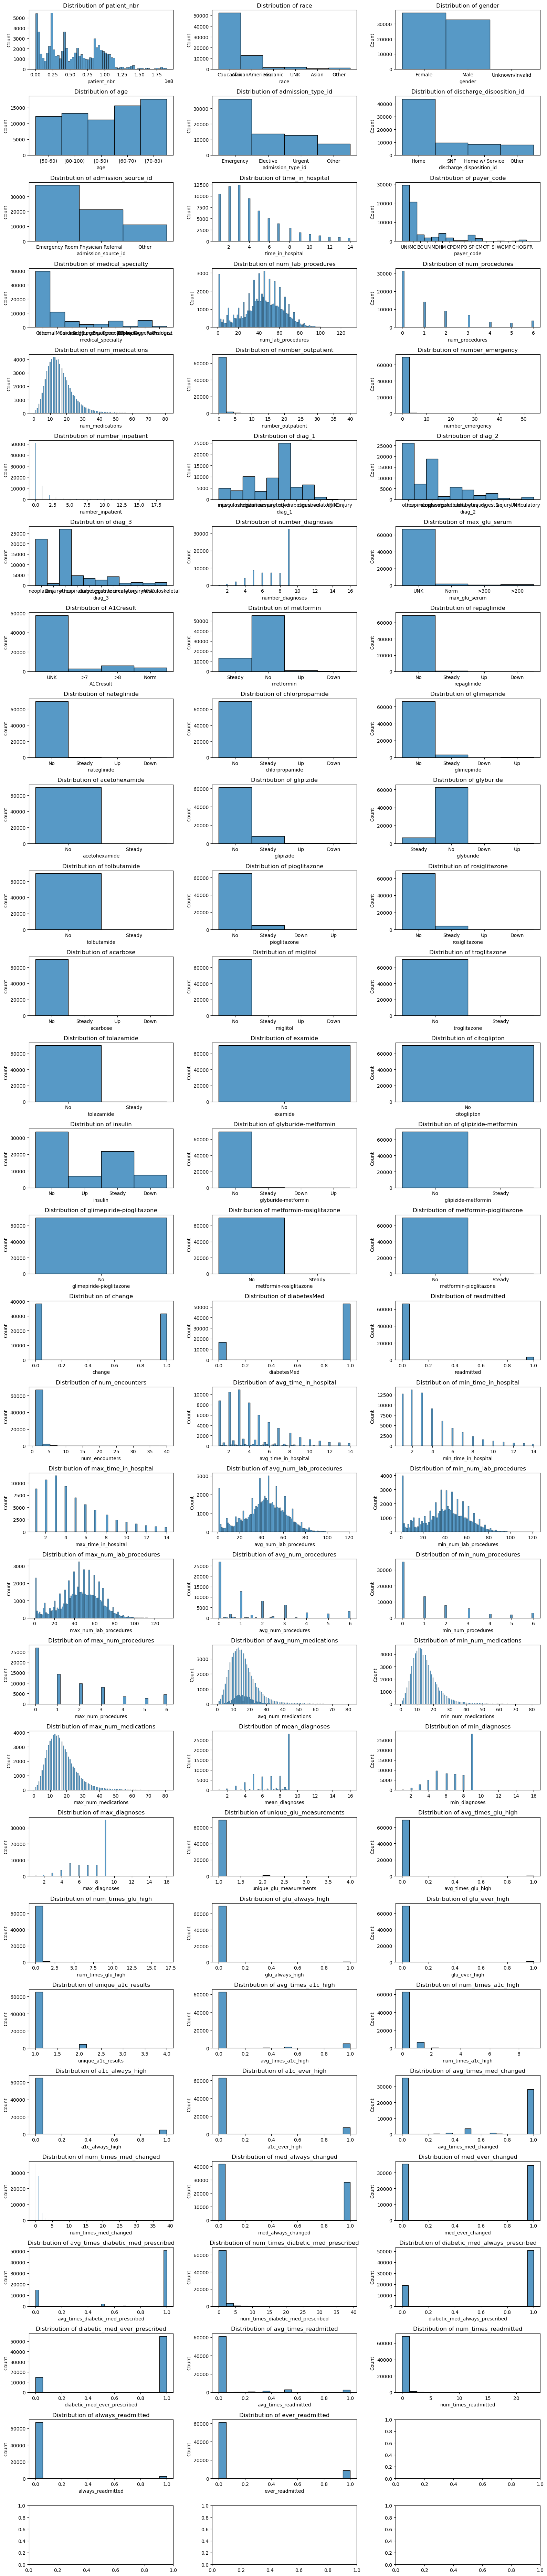

In [14]:
fig, axs = plt.subplots(30,3, figsize=(16, 75))
axs = axs.ravel()
omit = ['patient_nbr']

for i,col in enumerate(df_patients.columns):
    sns.histplot(df_patients[col], ax=axs[i], alpha=0.75)
    axs[i].set_title(f'Distribution of {col}')


plt.tight_layout()

<h2> Odd Distribution in the Number of Lab Procedures </h1>

Text(0.5, 1.0, 'Distribution of the Number of Lab Procedures')

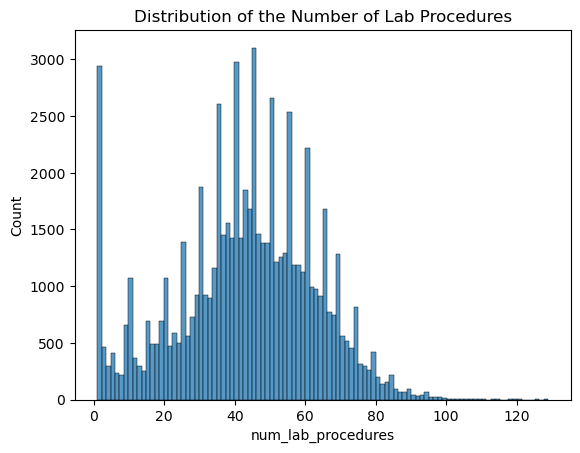

In [15]:
fig = sns.histplot(df_patients['num_lab_procedures'])
fig.set_title('Distribution of the Number of Lab Procedures')

<h1>Density Histogram Plots, Log Scale</h1>

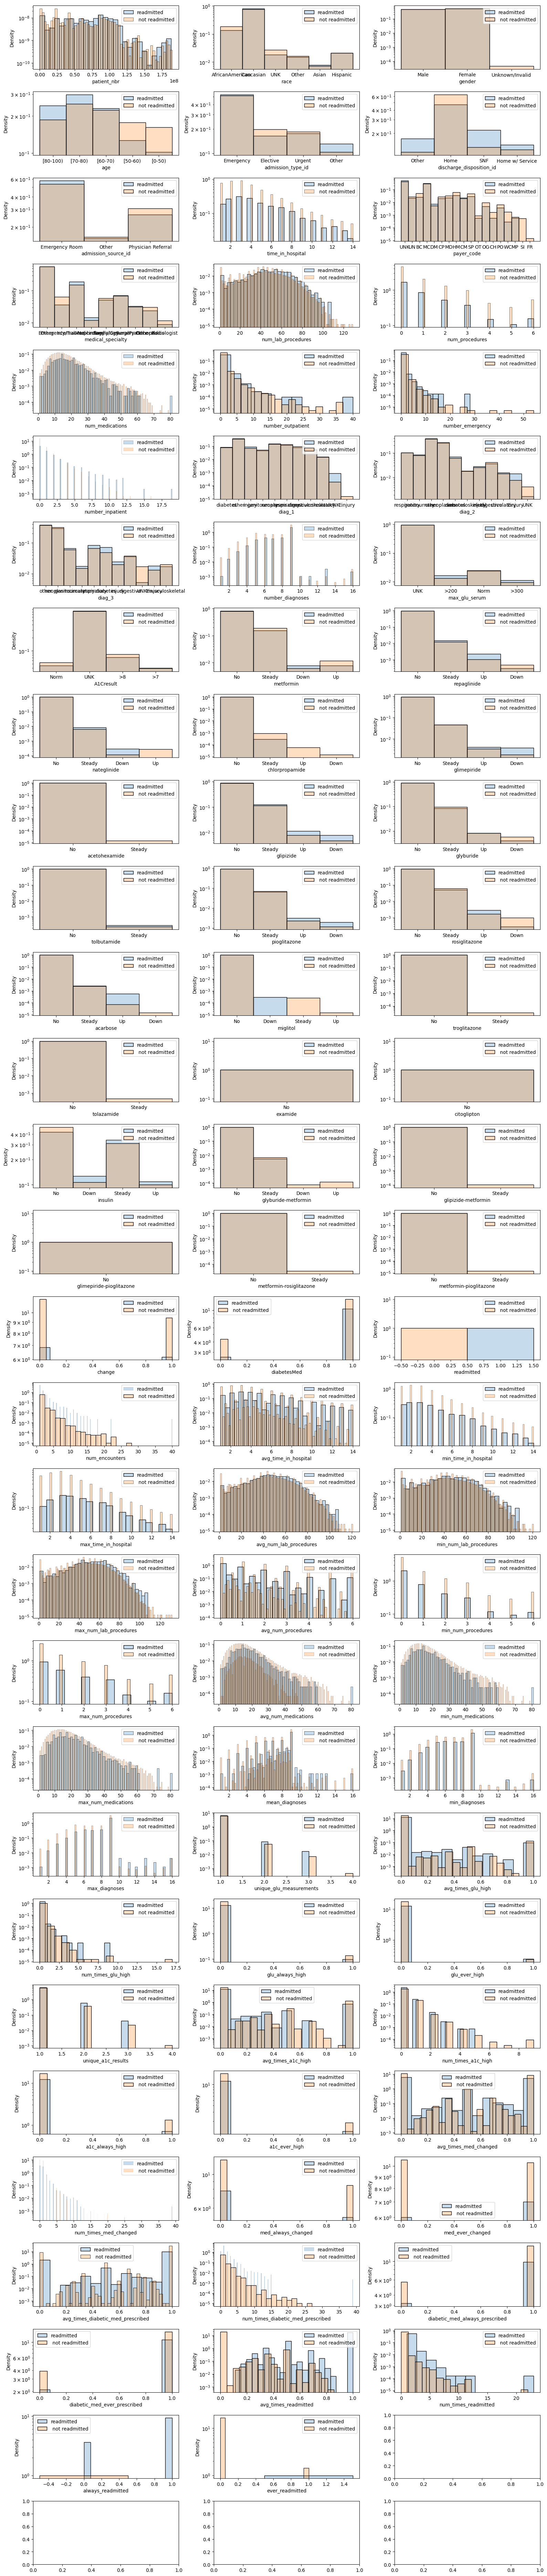

In [16]:
fig, axs = plt.subplots(30,3, figsize=(16, 75))
axs = axs.ravel()
omit = ['patient_nbr']
mask = df_patients['readmitted'] == 1

for i,col in enumerate(df_patients.columns):
    sns.histplot(df_patients[col][mask], ax=axs[i], alpha=0.25, label='readmitted', stat='density')
    sns.histplot(df_patients[col][~mask], ax=axs[i], alpha=0.25, label=' not readmitted', stat='density')
    axs[i].set_yscale('log')
    axs[i].legend()


plt.tight_layout()

<h1>Density Histogram Plots, Linear Scale </h1>

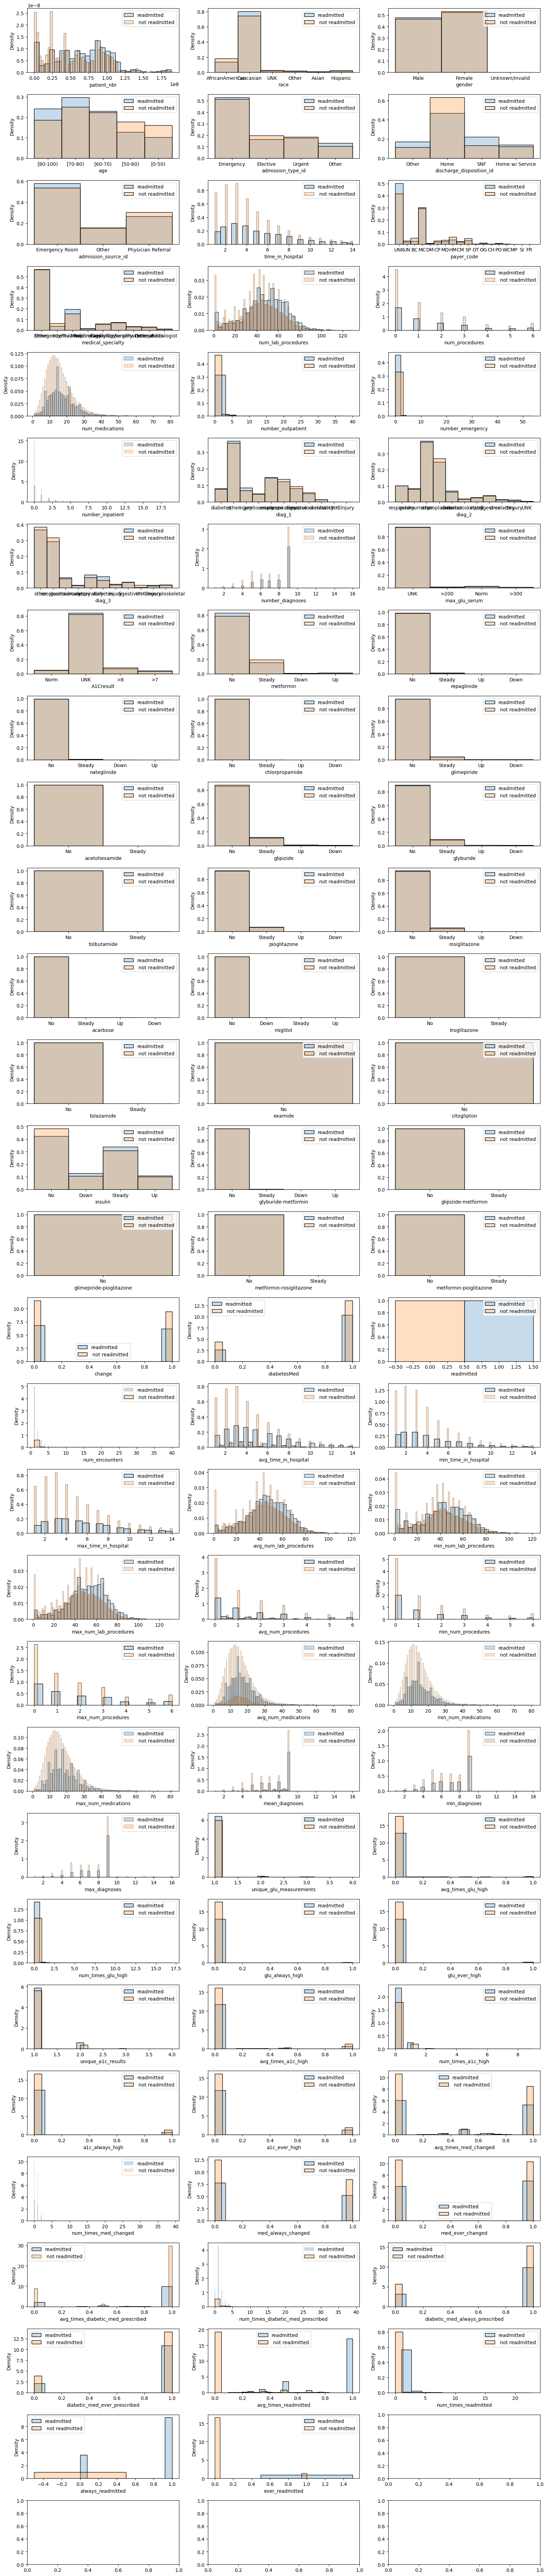

In [17]:
fig, axs = plt.subplots(30,3, figsize=(16, 75))
axs = axs.ravel()
omit = ['patient_nbr']
mask = df_patients['readmitted'] == 1

for i,col in enumerate(df_patients.columns):
    sns.histplot(df_patients[col][mask], ax=axs[i], alpha=0.25, label='readmitted', stat='density')
    sns.histplot(df_patients[col][~mask], ax=axs[i], alpha=0.25, label=' not readmitted', stat='density')
    axs[i].legend()


plt.tight_layout()

<h1>Density Histogram Plots, Shared Density</h1>

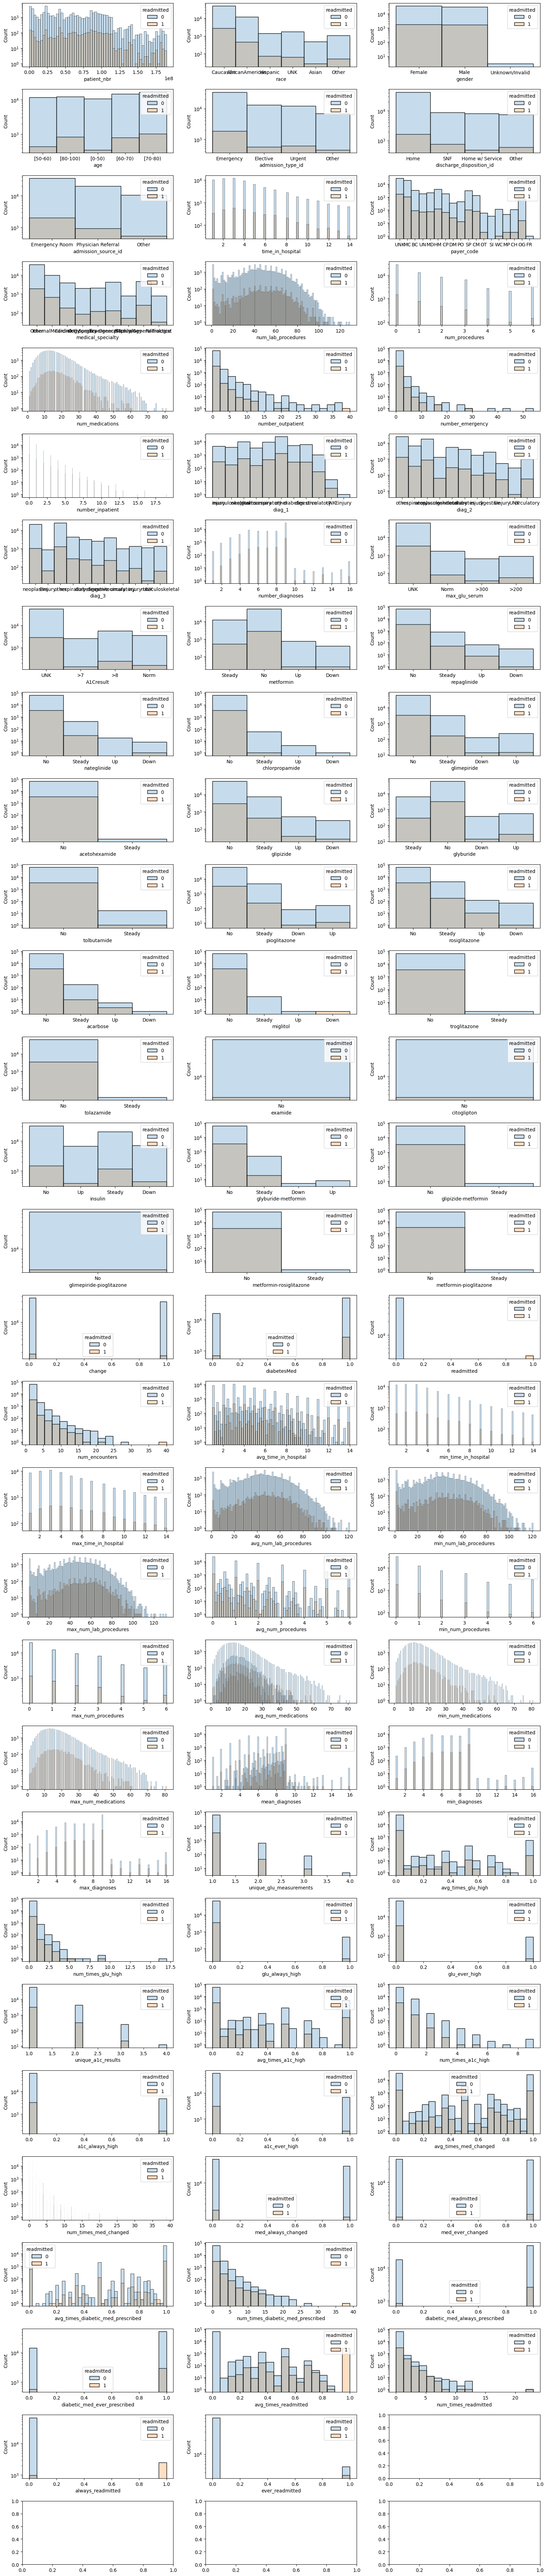

In [18]:
fig, axs = plt.subplots(30,3, figsize=(16, 75))
axs = axs.ravel()
omit = ['patient_nbr']
mask = df_patients['readmitted'] == 1

for i,col in enumerate(df_patients.columns):
    sns.histplot(x=df_patients[col], ax=axs[i], alpha=0.25, hue=df_patients['readmitted'])
    axs[i].set_yscale('log')


plt.tight_layout()

In [19]:
df_patients['metformin-pioglitazone']

0        No
1        No
2        No
3        No
4        No
         ..
69985    No
69986    No
69987    No
69988    No
69989    No
Name: metformin-pioglitazone, Length: 69990, dtype: object

In [20]:
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chloropropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone','tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

In [21]:
len(drugs)

23

<h1> Missing Values </h1>

After the pre processing, there are no more missing values.

In [22]:
# Using Steven's mising values table function

def missing_values_table(df, partition='training'):
    # count the missing values for each column
    missing_values = df.isnull().sum()
    # calculate the percentage of missing values
    missing_percentage = (100 * df.isnull().sum() / len(df))
    # create a table with the results
    missing_values_table = pd.concat([missing_values, missing_percentage], axis=1)
    # rename the columns
    missing_values_table_columns = missing_values_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    # sort the table by percentage of missing in descending order
    missing_values_table_columns = missing_values_table_columns[
        missing_values_table_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    # print a summary
    print(f"The {partition} data have " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(missing_values_table_columns.shape[0]) +
            " columns that have missing values.\n")
    # return the dataframe with missing info
    return missing_values_table_columns

In [23]:
missing_values_table(df=df_patients)

The training data have 86 columns.
There are 0 columns that have missing values.



Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [24]:
df_patients.head()

patient_nbr             race  gender       age admission_type_id  \
0          135        Caucasian  Female   [50-60)         Emergency   
1          378        Caucasian  Female   [50-60)          Elective   
2          729        Caucasian  Female  [80-100)         Emergency   
3          774        Caucasian  Female  [80-100)         Emergency   
4          927  AfricanAmerican  Female    [0-50)         Emergency   

  discharge_disposition_id admission_source_id  time_in_hospital payer_code  \
0                     Home      Emergency Room                 3        UNK   
1                     Home  Physician Referral                 2        UNK   
2                      SNF      Emergency Room                 4         MC   
3                     Home      Emergency Room                 3        UNK   
4                     Home      Emergency Room                 5        UNK   

  medical_specialty  num_lab_procedures  num_procedures  num_medications  \
0             Other                  31               1               14   
1             Other                  49               1               11   
2  InternalMedicine                  68               2               23   
3  InternalMedicine                  46               0               20   
4  InternalMedicine                  49               0                5   

   number_outpatient  number_emergency  number_inpatient           diag_1  \
0                  0                 0                 1           injury   
1                  0                 0                 0  musculoskeletal   
2                  0                 0                 0           injury   
3                  0                 0                 0        neoplasms   
4                  0                 0                 0     genitournary   

        diag_2     diag_3  number_diagnoses max_glu_serum A1Cresult metformin  \
0        other  neoplasms                 5           UNK       UNK    Steady   
1        other  neoplasms                 3           UNK       UNK        No   
2  respiratory    Einjury                 9           UNK        >7    Steady   
3        other      other                 9           UNK        >8    Steady   
4    neoplasms  neoplasms                 3           UNK       UNK        No   

  repaglinide nateglinide  ... mean_diagnoses min_diagnoses max_diagnoses  \
0          No          No  ...            6.5             5             8   
1          No          No  ...            3.0             3             3   
2          No          No  ...            9.0             9             9   
3          No          No  ...            9.0             9             9   
4          No          No  ...            3.0             3             3   

  unique_glu_measurements avg_times_glu_high num_times_glu_high  \
0                       1                0.0                  0   
1                       1                0.0                  0   
2                       1                0.0                  0   
3                       1                0.0                  0   
4                       1                0.0                  0   

  glu_always_high glu_ever_high unique_a1c_results avg_times_a1c_high  \
0               0             0                  1                0.0   
1               0             0                  1                0.0   
2               0             0                  1                0.0   
3               0             0                  1                1.0   
4               0             0                  1                0.0   

  num_times_a1c_high a1c_always_high a1c_ever_high avg_times_med_changed  \
0                  0               0             0                   1.0   
1                  0               0             0                   0.0   
2                  0               0             0                   0.0   
3                  1               1             1                   1.0   
4        

<h1> PCA </h1>

In [68]:
OHE = OneHotEncoder(sparse_output=False).fit(df_patients[object_cols])
ohe_data = OHE.transform(df_patients[object_cols])
ohe_df = pd.DataFrame(ohe_data, columns=OHE.get_feature_names_out())

In [69]:
scaler = StandardScaler().fit(df_patients[int64_cols + float64_cols])
scaled_numeric = scaler.transform(df_patients[int64_cols + float64_cols])
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=scaler.get_feature_names_out())
scaled_numeric_df = scaled_numeric_df.drop(['patient_nbr'], axis=1)

Try PCA Using only the Quantitative Columns

In [35]:
pca_quant = PCA().fit_transform(scaled_numeric_df)

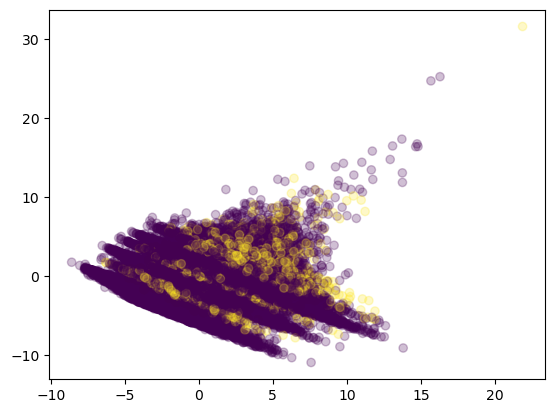

In [37]:
plt.scatter(pca_quant[:,0], pca_quant[:,1], c=df_patients.readmitted, alpha=0.25)

Text(0.5, 1.0, 'PCA on Non-Readmitted Patients, Quantitative Features')

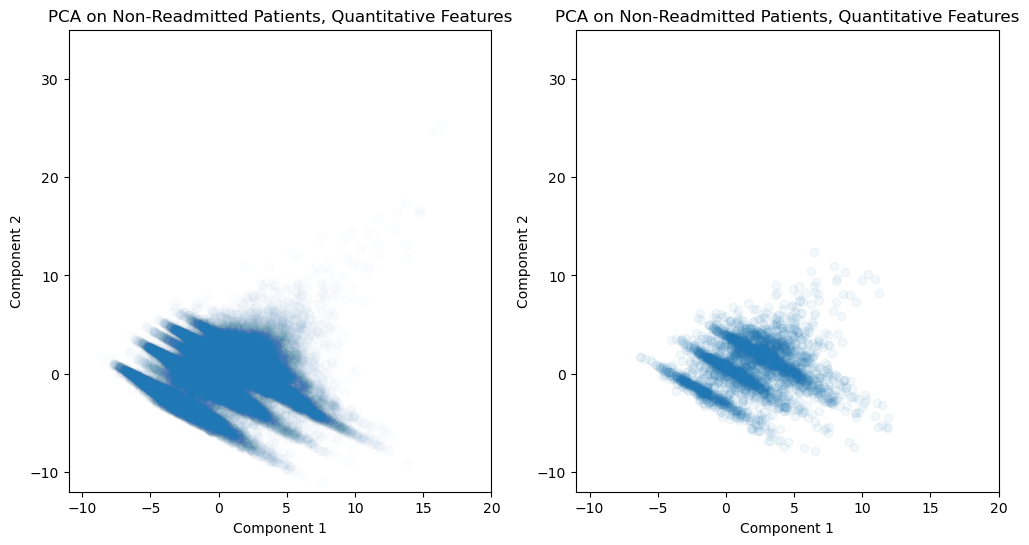

In [81]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
xlims = [-11, 20]
ylims = [-12, 35]
axs[0].scatter(pca_quant[~mask,0], pca_quant[~mask,1], alpha=0.01)
axs[1].scatter(pca_quant[mask,0], pca_quant[mask,1], alpha=0.05)
mask = df_patients.readmitted == 1

for ax in axs.ravel():
    ax.set_xlim(xlims)
    ax.set_xlabel('Component 1')
    ax.set_ylim(ylims)
    ax.set_ylabel("Component 2")

axs[0].set_title('PCA on Non-Readmitted Patients, Quantitative Features')
axs[1].set_title('PCA on Readmitted Patients, Quantitative Features')

To do PCA on the OHE categorical features, scale them using the standard scaler.

In [82]:
scaler_ohe = StandardScaler().fit(ohe_df)
scaled_ohe = scaler_ohe.transform(ohe_df)

scaled_ohe_df = pd.DataFrame(scaled_ohe, columns=scaler_ohe.get_feature_names_out())

In [83]:
pca_categorical = PCA().fit_transform(scaled_ohe_df)

Text(0.5, 1.0, 'PCA on Readmitted Patients, Categorical Features')

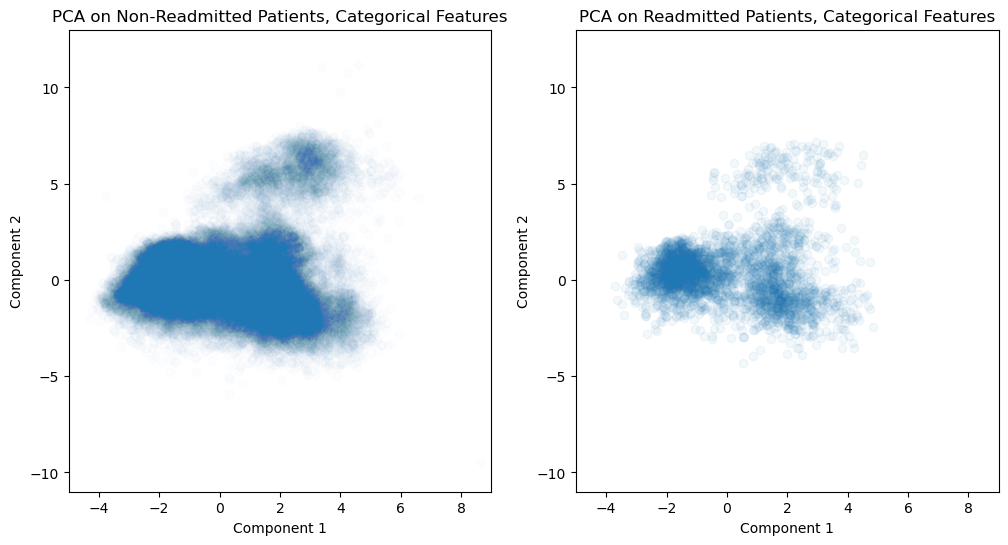

In [86]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
xlims = [-5, 9]
ylims = [-11, 13]
axs[0].scatter(pca_categorical[~mask,0], pca_categorical[~mask,1], alpha=0.01)
axs[1].scatter(pca_categorical[mask,0], pca_categorical[mask,1], alpha=0.05)

for ax in axs.ravel():
    ax.set_xlim(xlims)
    ax.set_xlabel('Component 1')
    ax.set_ylim(ylims)
    ax.set_ylabel("Component 2")

axs[0].set_title('PCA on Non-Readmitted Patients, Categorical Features')
axs[1].set_title('PCA on Readmitted Patients, Categorical Features')


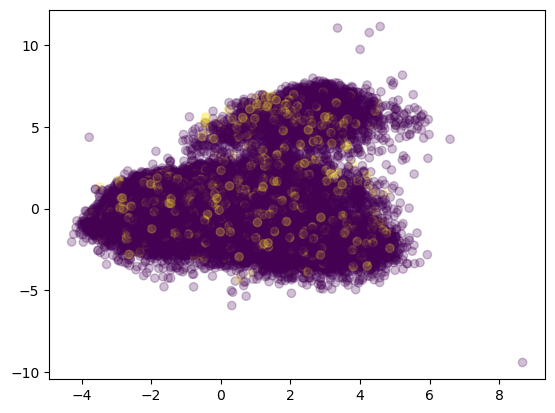

In [49]:
plt.scatter(pca_categorical[:,0], pca_categorical[:,1], c=df_patients.readmitted, alpha=0.25)